# Overview of Power System Dynamic Simulation with ANDES

## 🔍 Introduction to Transmission System Dynamic Simulation
Dynamic simulation of power systems is essential for analyzing the stability and performance of the electric grid under various operating conditions and disturbances. Unlike steady-state power flow analysis, dynamic simulation captures the time-dependent behavior of system variables such as rotor angles, frequencies, and bus voltages. This is critical for understanding how the system reacts to events like faults, generator trips, or sudden load changes.

### Why Perform Dynamic Simulation?
- To assess system stability under disturbances (e.g., faults, equipment tripping)
- To evaluate the effectiveness of control devices (AVRs, PSS, governors)
- To understand the interaction between generators and loads
- To support planning for high-penetration inverter-based resources (IBRs)
- To ensure reliability and resilience of power systems under extreme scenarios

### How is Dynamic Simulation Performed?
1. **Modeling the Network**: Include buses, generators, transmission lines, loads, and controllers.
2. **Defining Dynamic Models**: Assign appropriate machine, excitation, governor, and stabilizer models.
3. **Specifying Disturbances**: Define events such as faults, line trips, or generator outages.
4. **Solving DAEs**: Use numerical solvers to integrate differential-algebraic equations (DAEs) over time.
5. **Analyzing Results**: Observe system response in rotor angle, frequency, and voltage to determine stability.

ANDES (Automatic Network Dynamic Engine Simulator) is an open-source Python-based tool that allows flexible and efficient dynamic simulations. It supports standard dynamic models and customizable event handling, making it a suitable tool for academic and research applications in power system dynamics.

## 🧭 Generator Trip Example (Frequency and Voltage Response)
### 1. Install ANDES
Install ANDES using pip if not already installed.

In [1]:
!pip install andes --quiet

### 2. Clone ANDES Examples Repository

In [2]:
# !git clone https://github.com/CURENT/andes.git
# %cd andes/examples/demonstration

### 3. Import Required Libraries

In [3]:
import andes

### 4. Load IEEE 14-Bus Case

In [4]:
ieee14=andes.get_case("ieee14/ieee14_full.xlsx") #Gets case file from the location andes isinstalled
ss = andes.load(ieee14, setup=False, no_output=True)  #Set setup to False to make changes later

### 5. Add a Generator Trip Event
Trip Gen3 at t = 2.0 seconds.

In [5]:
#Add Toggle that disconnects GEN3 at 2s
ss.add("Toggle", dict(model='SynGen', dev="GENROU_3", t=2.0))

ss.setup() #Setup after adding toggle

# These settings make loads behave as constant power
ss.PQ.config.p2p = 1
ss.PQ.config.q2q = 1
ss.PQ.config.p2z = 0
ss.PQ.config.q2z = 0

ss.PFlow.run()

True

### 6. Run Time-Domain Simulation

In [6]:
#Set a simulation time
ss.TDS.config.tf = 20
#Turning off the stability criteria temporarily 
ss.TDS.config.criteria = 0 
#Run TDS
ss.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

<Toggle Toggle_1>: SynGen.GENROU_3 status changed to 0 at t=2.0 sec.


True

### 7. Plot Frequency and Voltage Response

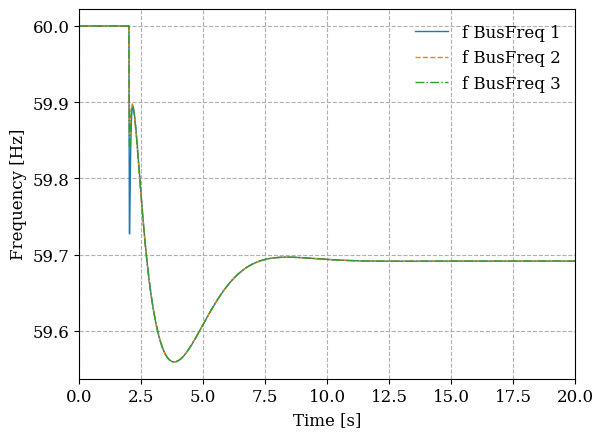

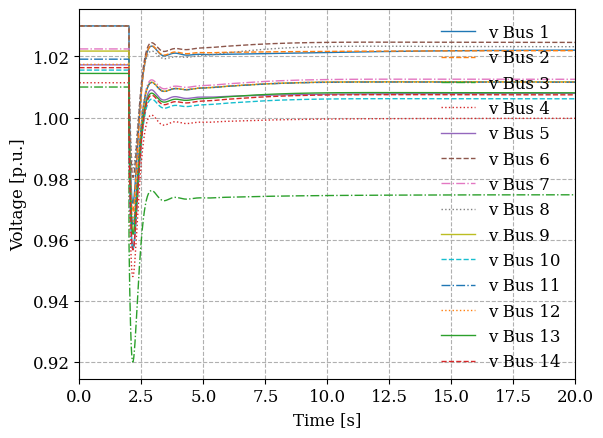

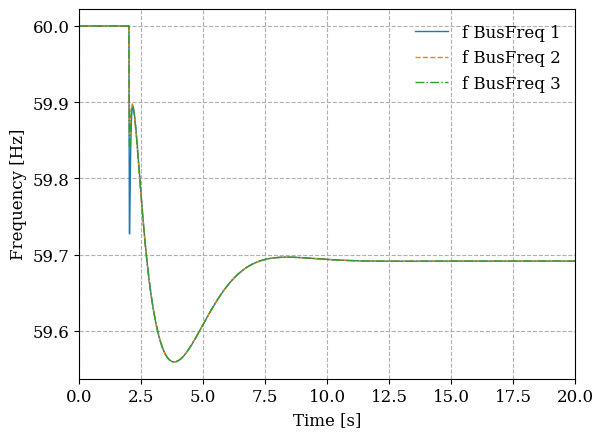

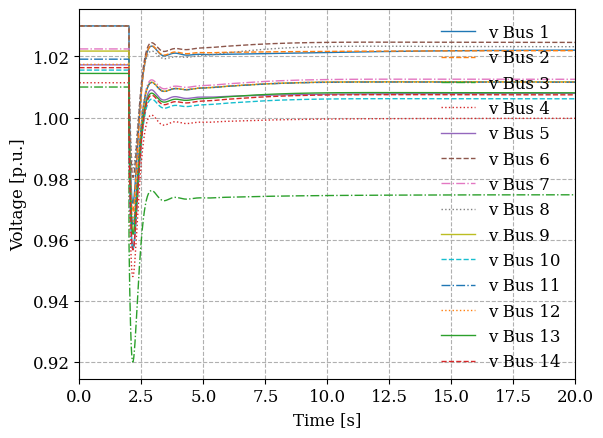

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Time [s]', ylabel='Voltage [p.u.]'>)

In [8]:
%matplotlib inline
#Plot Bus Frequency. It will plot for buses with already defined BusFreq in case file
ss.TDS.plt.plot(ss.BusFreq.f,
                ytimes=60,
                latex=False,
                grid=True,
                legend=True,
                ylabel='Frequency [Hz]')

# Plot the bus voltage in per unit
ss.TDS.plt.plot(ss.Bus.v,
                latex=False,
                grid=True,
                legend=True,
                ylabel='Voltage [p.u.]')

---

## 📚 References
- ANDES Docs: https://docs.andes.app/
- GitHub Repo: https://github.com/CURENT/andes
- HELICS Docs: https://docs.helics.org/

---

## ✅ Done!
This example demonstrates how to simulate a generator trip and observe system frequency and voltage response in the IEEE 14-bus system using ANDES as a transmission system federate.
